### Dataset - Penguins

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import seaborn as sns # type: ignore
import math

warnings.filterwarnings('ignore')

### Dataset - Penguins

In [2]:
df = pd.read_csv('./penguins.csv')

In [3]:
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [4]:
print(df.shape)

(344, 10)


In [5]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [6]:
print(df.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB
None


In [8]:
categorical = df.select_dtypes(include=['object']).columns


In [9]:
numerical = df.select_dtypes(include=['int64','float64']).columns


In [10]:
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: Index(['species', 'island', 'gender'], dtype='object')
Numerical columns: Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


In [11]:
print(df.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


### Droping
Since the null values are in less numbers, we will not execute this.

In [12]:
print("Unique values in each column ",df.nunique())

Unique values in each column  species                     8
island                      8
calorie requirement       333
average sleep duration      8
bill_length_mm            172
bill_depth_mm              83
flipper_length_mm          60
body_mass_g                97
gender                      4
year                        3
dtype: int64


In [13]:
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean = df[i].mean()
        df[i].fillna(math.ceil(mean),inplace=True)


In [14]:
df.isnull().sum()

species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

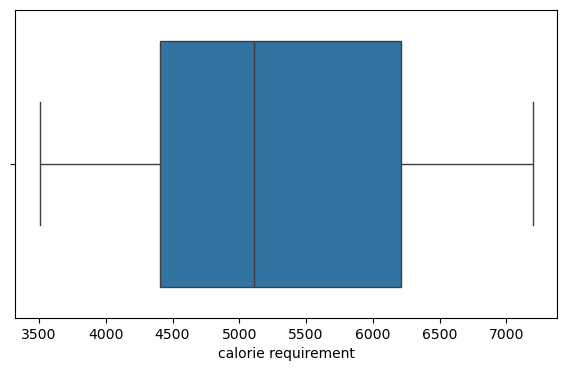

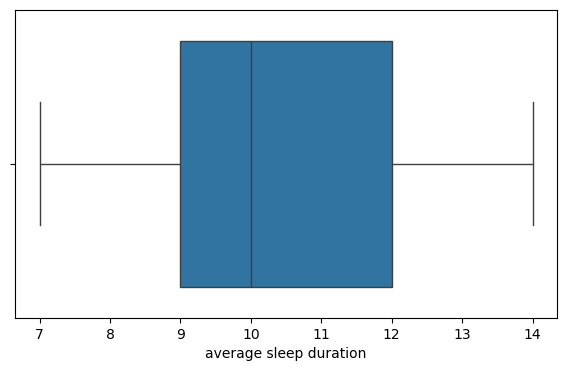

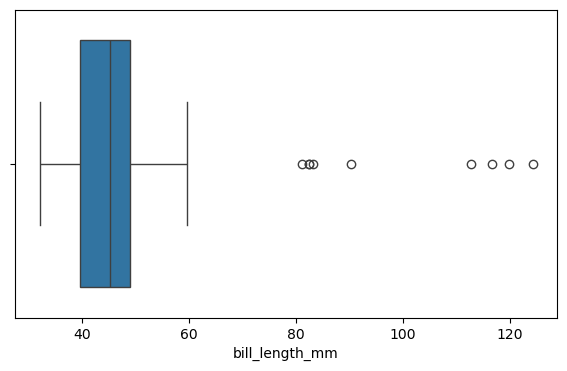

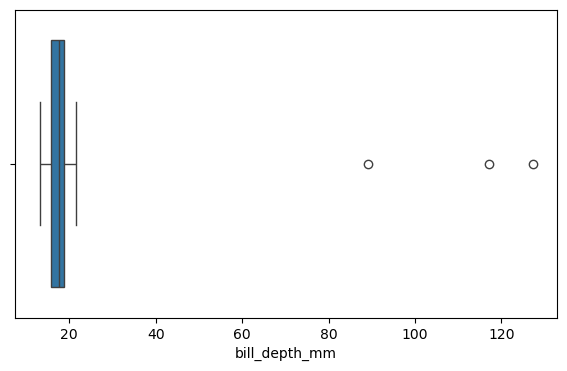

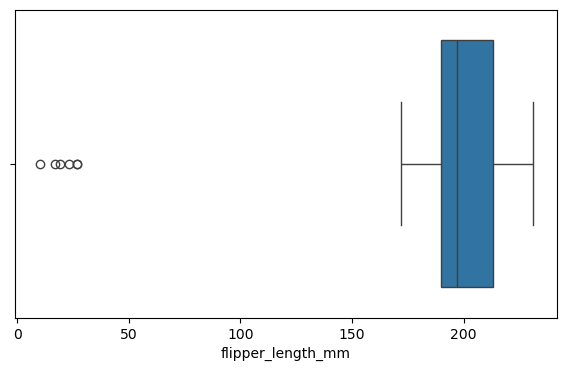

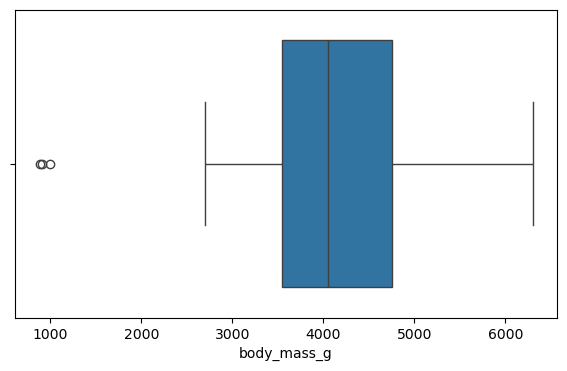

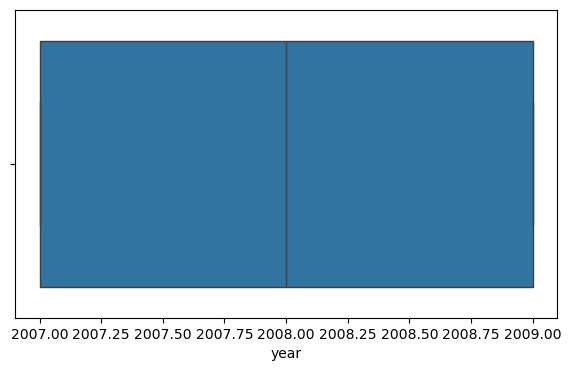

In [15]:
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])
    plt.show()

In [16]:
df_zscore = df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()


In [17]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,calorie requirement_z-score,average sleep duration_z-score,bill_length_mm_z-score,bill_depth_mm_z-score,flipper_length_mm_z-score,body_mass_g_z-score,year_z-score
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,1.210718,0.243756,-0.598267,0.071511,-0.611191,-0.499126,-1.272466
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,-0.355822,1.567736,-0.560902,-0.071447,-0.428967,-0.440471,-1.272466
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,1.792201,0.243756,-0.486171,-0.005466,-0.100965,-1.085684,-1.272466
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0,-1.030941,-1.080224,0.046286,0.104501,0.008370,-3.734577,-1.272466
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,-0.464440,-1.080224,-0.822460,0.137491,-0.173854,-0.851061,-1.272466


In [18]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")


Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 9
Number of outliers in bill_depth_mm_z-score: 3
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [19]:
df.loc[df_zscore['bill_length_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
17,adelie,Torgersen,6543,8,82.40,20.7,197.0,4500.0,male,2007.0
21,Adelie,Biscoe,4138,8,82.47,18.7,180.0,3600.0,male,2007.0
72,Adelie,torgersen,3955,12,119.89,17.2,196.0,4176.0,male,2008.0
92,Adelie,Dream,4612,12,81.10,17.1,27.0,3400.0,female,2008.0
147,Adelie,Biscoe,6356,10,124.30,18.4,184.0,3475.0,male,2009.0
210,gentoo,Biscoe,4985,11,90.30,14.5,208.0,4450.0,female,2008.0
279,CHINSTRAP,Biscoe,5337,9,116.67,18.7,198.0,3525.0,female,2007.0
322,Chinstrap,Dream,3802,9,83.27,17.9,19.0,3400.0,female,2009.0
335,chinstrap,DREAM,7195,13,112.75,19.4,194.0,3525.0,female,2009.0


In [20]:
df.loc[df_zscore['bill_depth_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
36,Adelie,Dream,3758,7,38.8,89.21,190.0,3950.0,male,2007.0
116,Adelie,Torgersen,5580,12,46.0,117.23,188.0,2900.0,FEMALE,2009.0
161,gentoo,biscoe,4743,12,46.8,127.26,215.0,5150.0,male,2007.0


In [21]:
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_length_mm_z-score'] > 3].index)
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_depth_mm_z-score'] > 3].index)

In [22]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")

Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 0
Number of outliers in bill_depth_mm_z-score: 0
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [23]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])

In [24]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [25]:
df_outlier_free = df_zscore.copy()

In [26]:
df_outlier_free.shape

(332, 10)

In [27]:
df_outlier_free['species']=df_outlier_free['species'].str.upper()

In [28]:
df_outlier_free['island']=df_outlier_free['island'].str.upper()

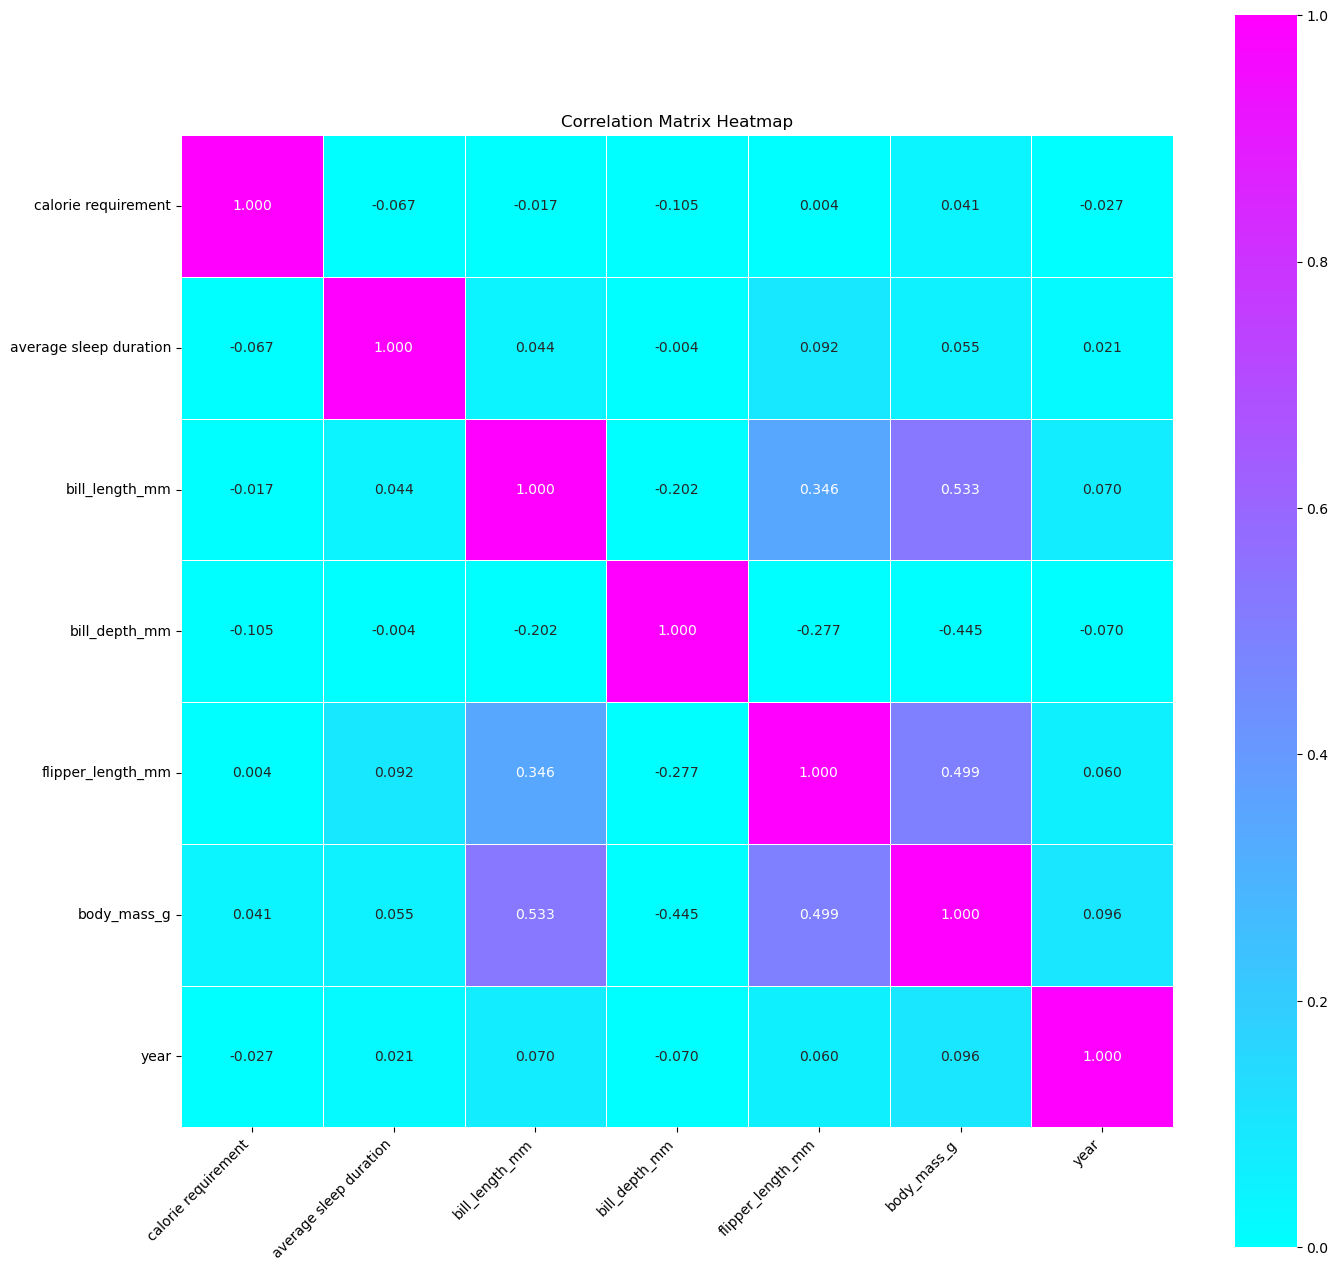

In [29]:
# finding correlation between target variable and numerical variables 
df_correlation = df_outlier_free.copy()
df_correlation['gender'] = df_correlation['gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)
columnOrder = [x for x in df_correlation.columns if x not in ["gender","species","island"]]
df_correlation = df_correlation[columnOrder]

correlation_matrix = df_correlation.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, 
            annot=True,        
            cmap='cool',  
            vmin=0, vmax=1,  
            linewidths=0.5,  
            square=True,
            fmt='.3f')    
plt.xticks(rotation=45, ha='right') 
# plt.tight_layout()
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
# Reference : gishnuma_assignmen0_final.ipnb
df_groupby_species = df_outlier_free.groupby('species').size()

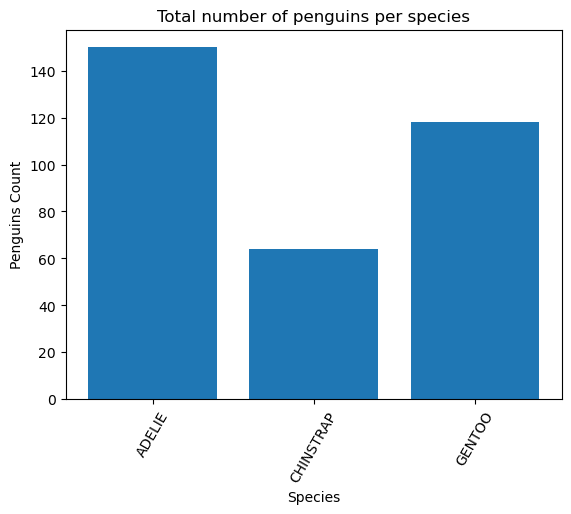

In [31]:
plt.bar(df_groupby_species.index,df_groupby_species.values)
plt.xlabel('Species')
plt.ylabel('Penguins Count')
plt.title('Total number of penguins per species')
plt.xticks(rotation=60)
plt.show()

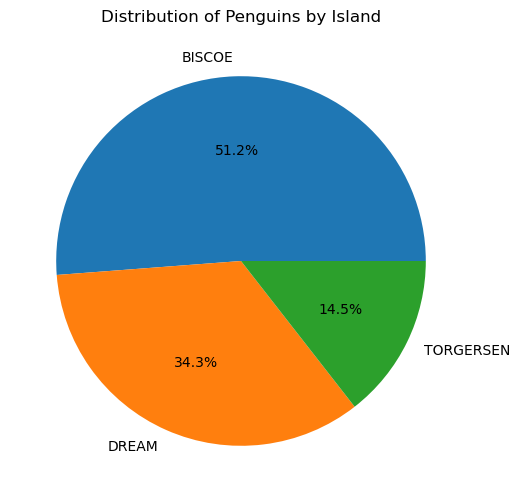

In [32]:
island_counts = df_outlier_free['island'].value_counts().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Penguins by Island")
plt.show()

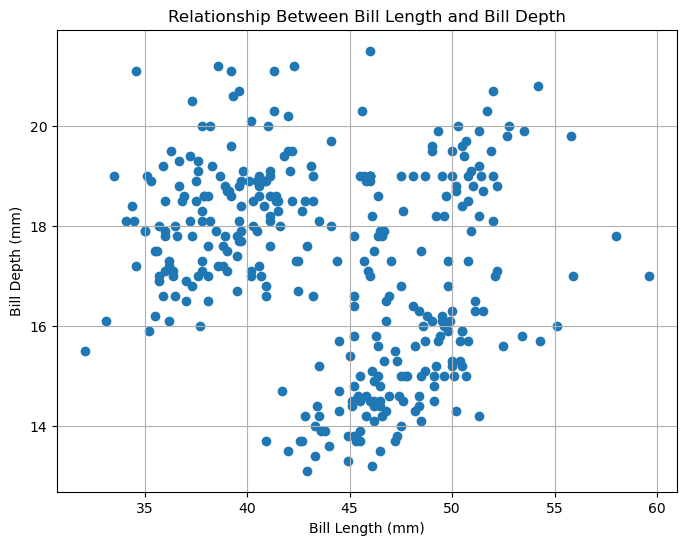

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df_outlier_free["bill_length_mm"], df_outlier_free["bill_depth_mm"])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Relationship Between Bill Length and Bill Depth")
plt.grid(True)
plt.show()

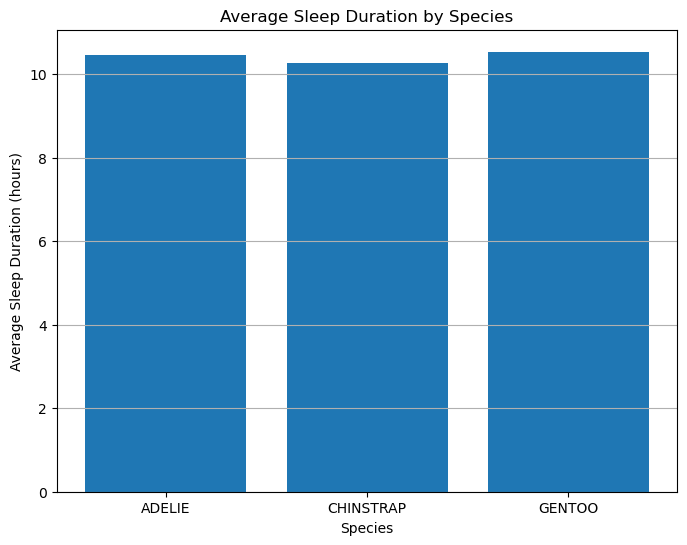

In [34]:
avg_sleep_by_species = df_outlier_free.groupby('species')['average sleep duration'].mean()

# Bar graph for average sleep duration by species
plt.figure(figsize=(8, 6))
plt.bar(avg_sleep_by_species.index, avg_sleep_by_species.values)
plt.xlabel("Species")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Average Sleep Duration by Species")
plt.grid(axis='y')
plt.show()

We will take gender as the target. therefore dropping it before we conduct encoding

In [35]:
categorical_columns=categorical.drop('gender')

In [36]:
df_encoded = pd.get_dummies(df_outlier_free, columns=categorical_columns)

In [37]:
df_encoded.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN
0,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,True,False,False,False,False,True
1,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,True,False,False,False,False,True
2,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,True,False,False,False,False,True
3,4169,8,46.0,19.0,198.0,992.0,male,2007.0,True,False,False,False,False,True
4,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,True,False,False,False,False,True


In [38]:
df_encoded.shape

(332, 14)

In [39]:
df_normalized = df_outlier_free.get(numerical)

In [40]:
df_normalized.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,6563,11,39.1,18.7,181.0,3750.0,2007.0
1,4890,14,39.5,17.4,186.0,3800.0,2007.0
2,7184,11,40.3,18.0,195.0,3250.0,2007.0
3,4169,8,46.0,19.0,198.0,992.0,2007.0
4,4774,8,36.7,19.3,193.0,3450.0,2007.0


In [41]:
min_values = df_normalized.min()
max_values = df_normalized.max()

In [42]:
normalized_df = (df_normalized - min_values) / (max_values - min_values)

In [43]:
normalized_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0


In [44]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,8:],df_encoded['gender']], axis=1)

In [45]:
pre_processed_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN,gender
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0,True,False,False,False,False,True,male
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0,True,False,False,False,False,True,female
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0,True,False,False,False,False,True,female
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0,True,False,False,False,False,True,male
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0,True,False,False,False,False,True,female


In [46]:
pre_processed_df.to_csv('penguins_preprocessed.csv', index=False)

### Dataset - Emisions By Country

In [47]:
df = pd.read_csv('emissions_by_country.csv')

In [48]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [50]:
print(df.describe())

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

In [51]:
print(df.shape)

(63104, 13)


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB
None


In [53]:
print(df.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


In [54]:
categorical = df.select_dtypes(include=['object']).columns

In [55]:
numerical = df.select_dtypes(include=['int64','float64']).columns

In [56]:
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: Index(['Country', 'ISO 3166-1 alpha-3'], dtype='object')
Numerical columns: Index(['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')


In [57]:
print("Unique values in each column ",df.nunique())

Unique values in each column  Country                   638
ISO 3166-1 alpha-3        449
Year                     1243
Total                   16471
Temperature                60
GDP Per Capita (USD)    30779
Coal                    11101
Oil                     12096
Gas                      7053
Cement                   9253
Flaring                  3974
Other                    2327
Per Capita              17319
dtype: int64


Here we can observe that Other column is most likely null and can be ignored. But other columns hold relevant information and can not be eliminated nor can be imputed, since it would not be in line with real world scenario. 

In [58]:
df = df.drop('Other', axis=1)

In [59]:
print(df.columns)

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')


In [60]:
# with this we eliminate country and iso reference null values 
df_1 = df.loc[df['Country'].notnull() & df['ISO 3166-1 alpha-3'].notnull()]

In [61]:
print(df_1.isnull().sum())

Country                     0
ISO 3166-1 alpha-3          0
Year                      318
Total                     399
Temperature                 0
GDP Per Capita (USD)        0
Coal                    37667
Oil                     37710
Gas                     37803
Cement                  38729
Flaring                 37969
Per Capita              40467
dtype: int64


In [62]:
numerical = df.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Per Capita'],
      dtype='object')


### We impute the data. Here we can observe that the dataset is highly 

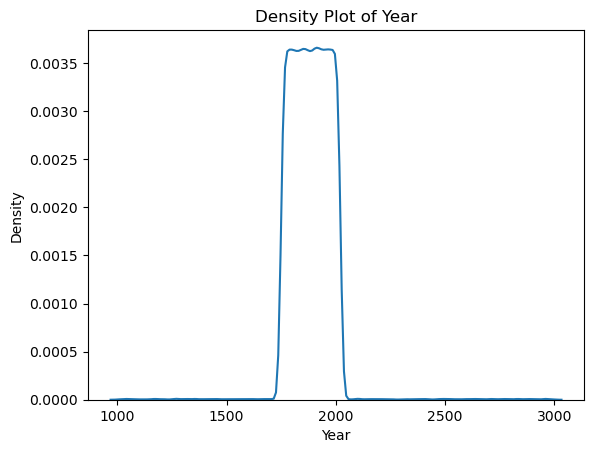

column name Year


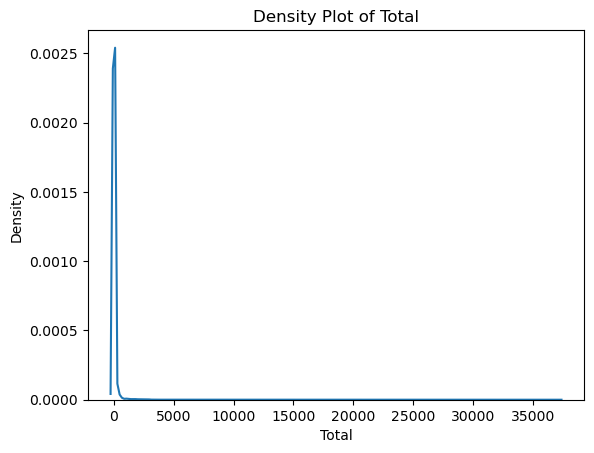

column name Total


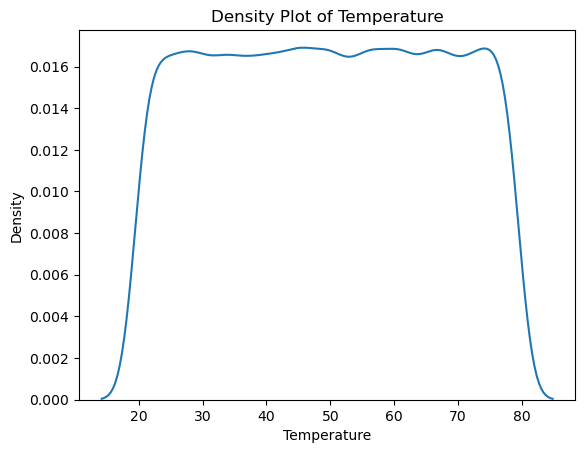

column name Temperature


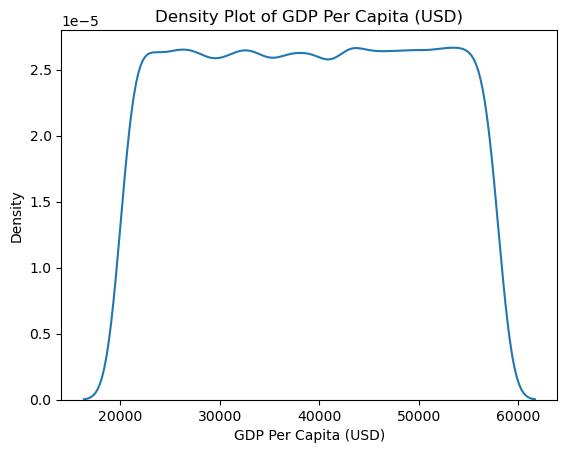

column name GDP Per Capita (USD)


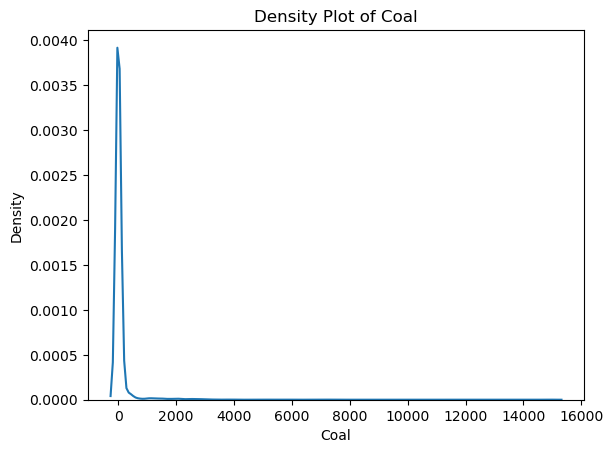

column name Coal


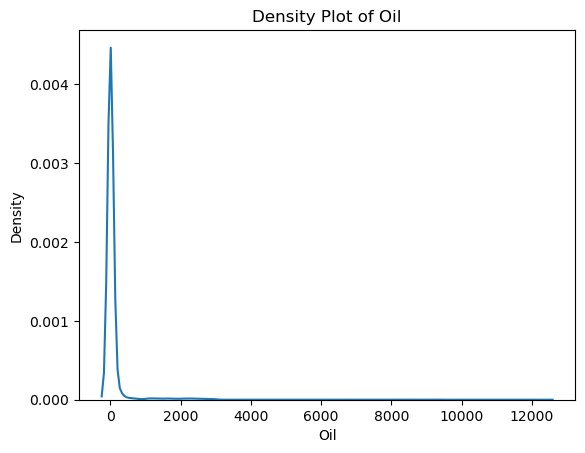

column name Oil


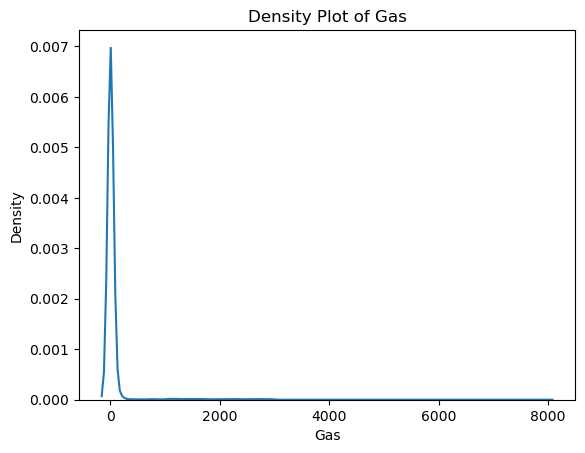

column name Gas


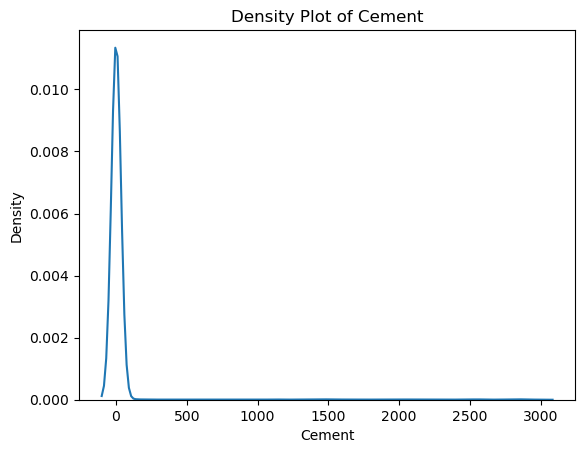

column name Cement


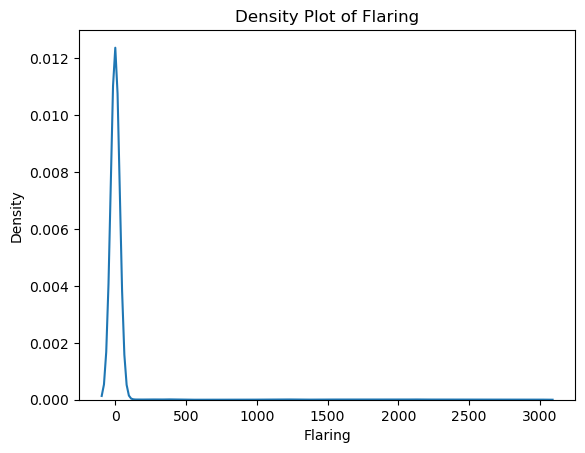

column name Flaring


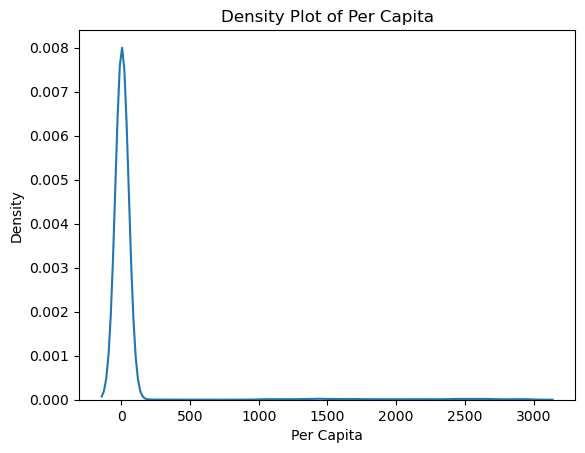

column name Per Capita


In [63]:
for i in numerical:
    sns.kdeplot(df_1[i])
    plt.title(f'Density Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()
    print(f'column name {i}')


### We know that if the column data density is normal distribution then we need to take the mean. Whereas if the data is skewed then we need to take median or mode. Therefore, with the distribution graph we will take the decision. 

In [64]:
normal_distribution_columns = ['Temperature','Year', 'GDP Per Capita (USD)']
skewed_distributed_columns = list(set(numerical).difference(set(normal_distribution_columns))) 

print(f'skewed_distributed_columns:{skewed_distributed_columns}')
print(f'normal_distribution_columns:{normal_distribution_columns}')

skewed_distributed_columns:['Total', 'Per Capita', 'Cement', 'Oil', 'Flaring', 'Gas', 'Coal']
normal_distribution_columns:['Temperature', 'Year', 'GDP Per Capita (USD)']


In [65]:
for i in normal_distribution_columns:
        mean = df_1[i].mean()
        df_1[i].fillna(math.ceil(mean),inplace=True)

for i in skewed_distributed_columns:
        median_value = df_1[i].median()
        df_1[i].fillna(median_value,inplace=True)

In [66]:
print(df_1.isnull().sum())

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Per Capita              0
dtype: int64


In [67]:
clean_df = df_1

In [68]:
print(clean_df.shape)

(58210, 12)


In [69]:
clean_df = clean_df.rename({'ISO 3166-1 alpha-3': 'ISO'}, axis='columns')

In [70]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,Afghanistan,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,Afghanistan,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,Afghanistan,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,Afghanistan,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


In [71]:
clean_df['Country']=clean_df['Country'].str.upper()

In [72]:
clean_df['ISO'] = clean_df['ISO'].str.upper()

In [73]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


EDA Graphical exploration 

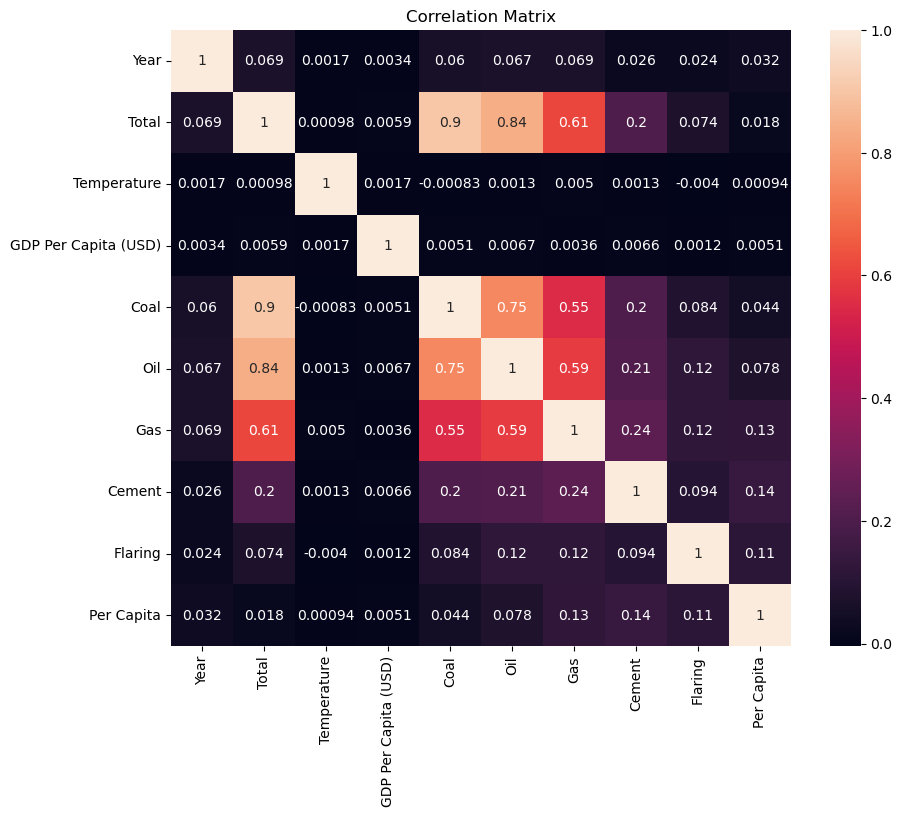

In [74]:
numeric_df = clean_df.select_dtypes(include=['float64','int64'])
matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### We can observe that with the data, we dont see much of a correlation between temperature and the natural resources production. This can mean a multitude of things, including questioning the accuracy of the data. But the interesting part is the correlation between per capita and the natural resources. Which can shed light on how much consumption of natural resources increase as per increase in per capita. We low key know that energy consumption increases with per capita increase, so we can select Per capita as a target variable and find this positive association is true or not. 

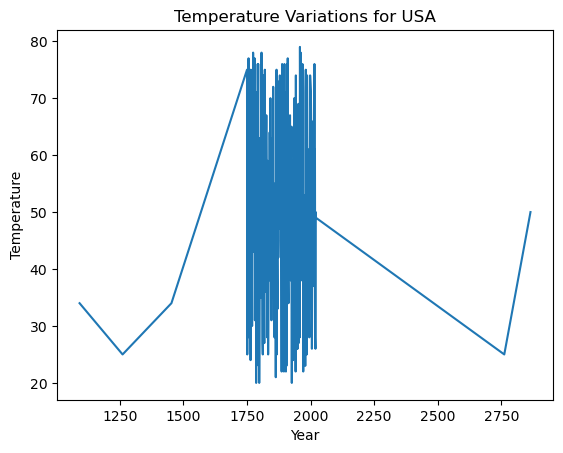

In [75]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

This particular analysis shows further gap in the data. There exists data pointing to future as well. We will delete all these entries and put it to clean_df

In [76]:
clean_df = clean_df.loc[clean_df['Year'] < 2024]

This operation should eliminate undesired future dates.

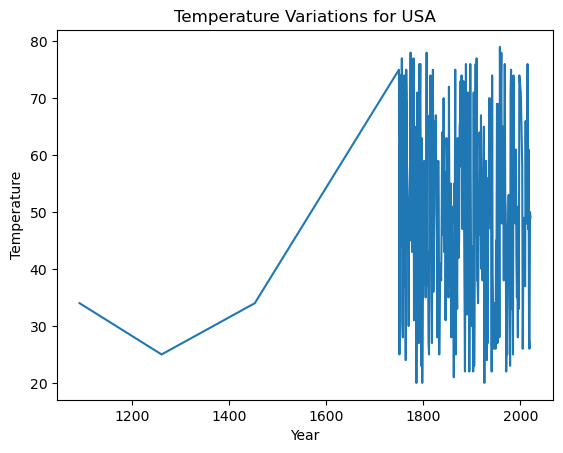

In [77]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

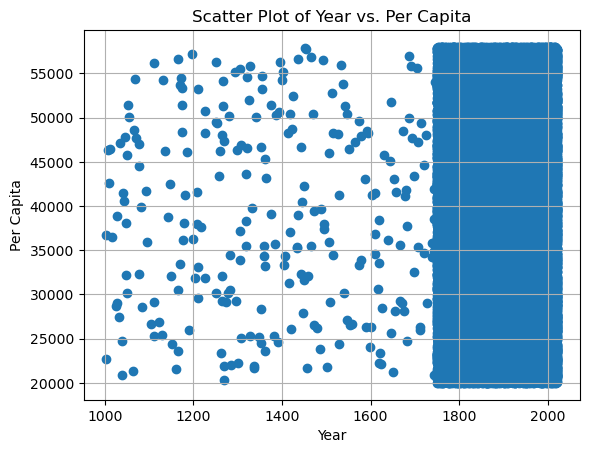

In [78]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

In [79]:
clean_df = clean_df.loc[clean_df['Year'] != 0]


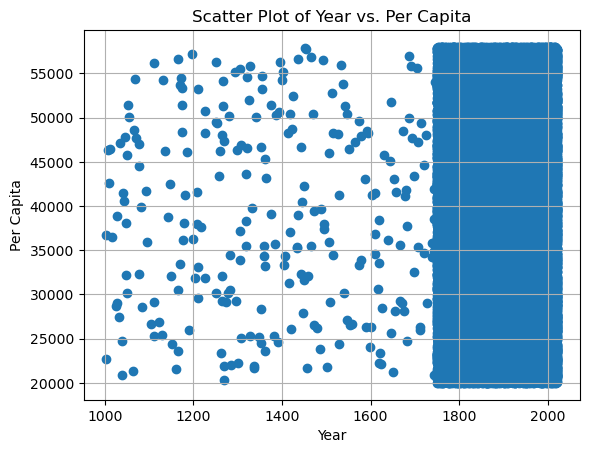

In [80]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

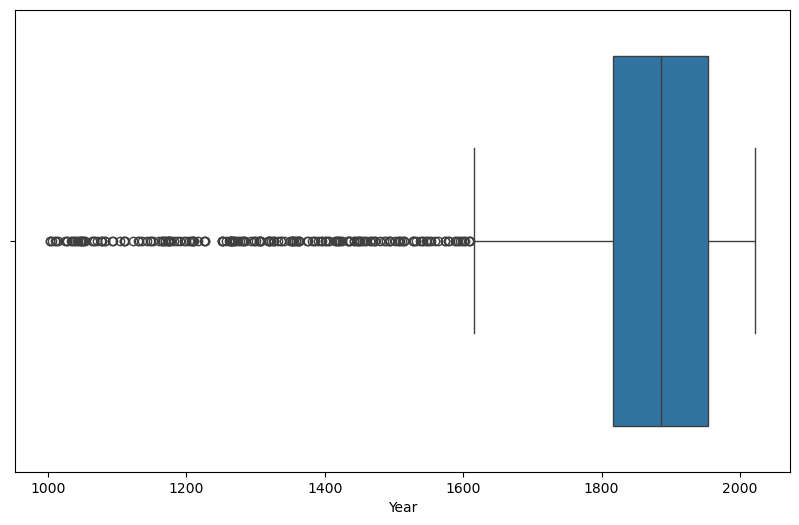

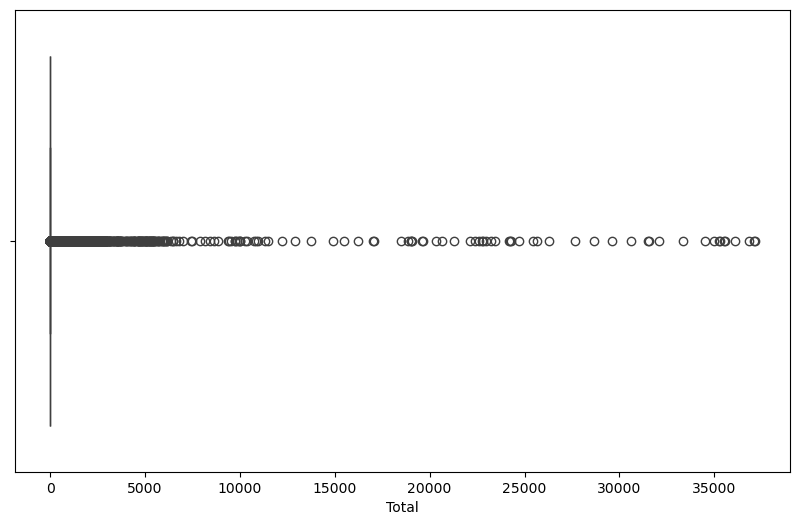

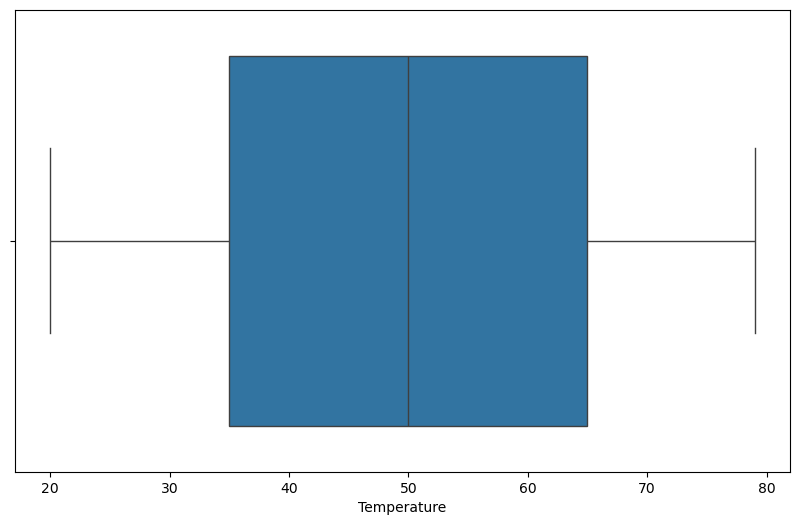

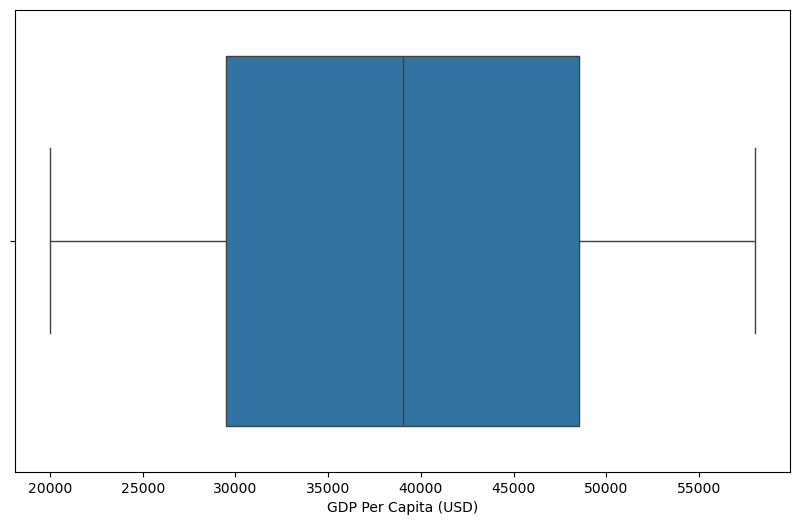

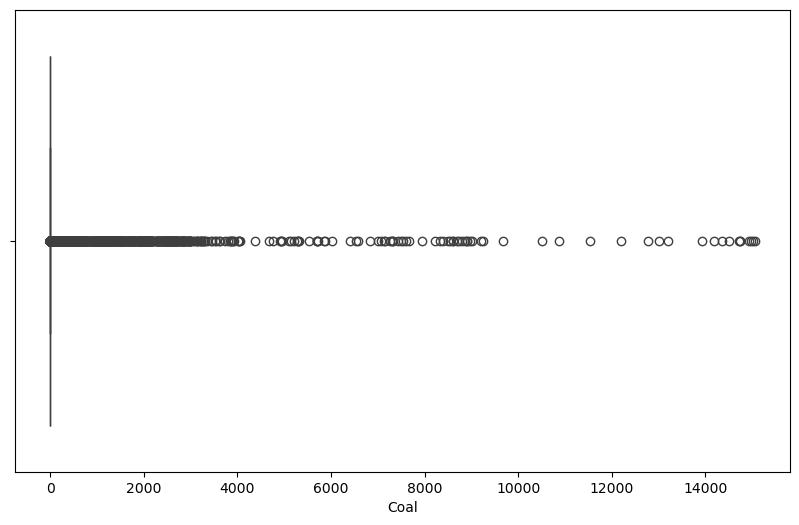

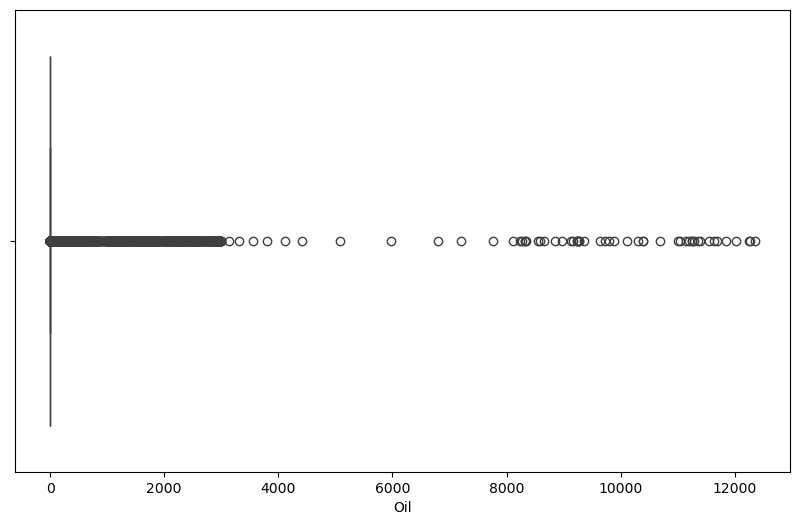

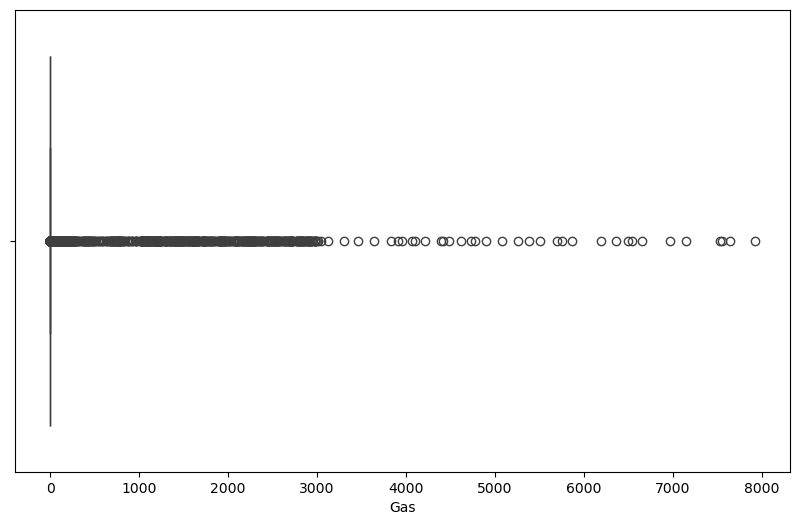

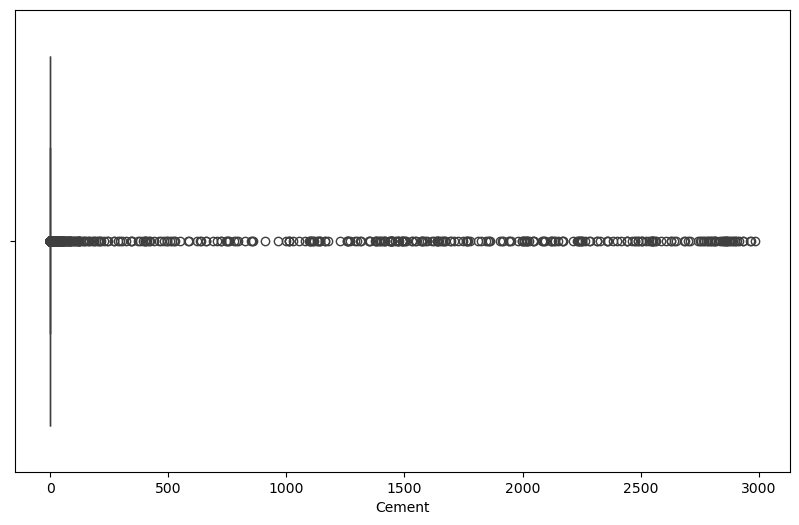

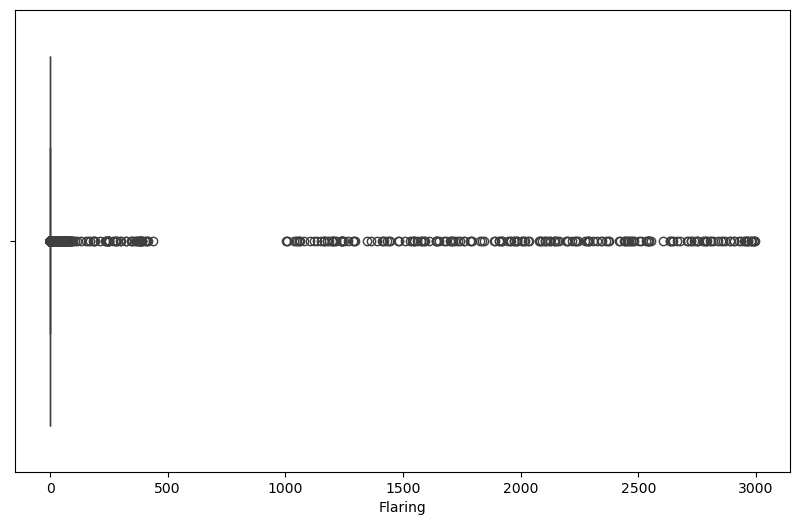

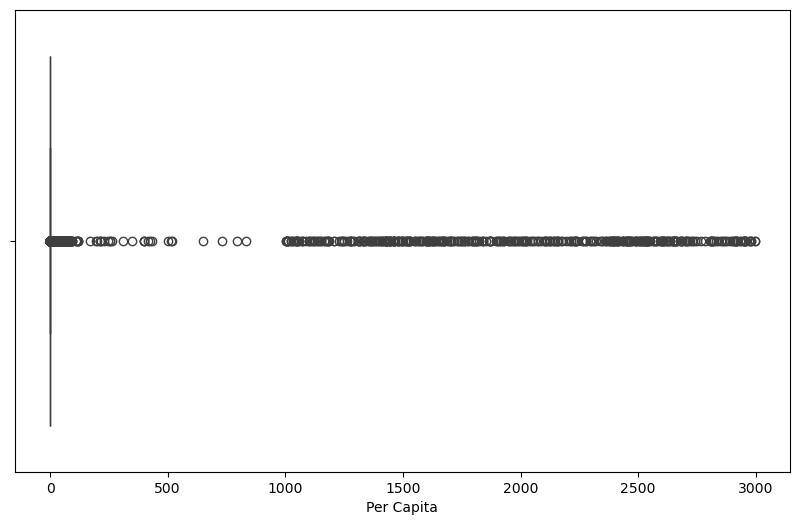

In [81]:
for c in clean_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clean_df[c])
    plt.show()

In [82]:
df_zscore = clean_df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()

In [83]:
df_zscore.head()


,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_zscore.shape

(57888, 22)

In [85]:
capture_outlier_column = []
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3 ]
    print(f"Number of outliers in {i}: {len(outliers)}")
    if len(outliers) > 0:
        capture_outlier_column.append(i)

Number of outliers in Year_z-score: 0
Number of outliers in Total_z-score: 240
Number of outliers in Temperature_z-score: 0
Number of outliers in GDP Per Capita (USD)_z-score: 0
Number of outliers in Coal_z-score: 220
Number of outliers in Oil_z-score: 246
Number of outliers in Gas_z-score: 284
Number of outliers in Cement_z-score: 213
Number of outliers in Flaring_z-score: 195
Number of outliers in Per Capita_z-score: 290


In [86]:
capture_outlier_column

['Total_z-score',
 'Coal_z-score',
 'Oil_z-score',
 'Gas_z-score',
 'Cement_z-score',
 'Flaring_z-score',
 'Per Capita_z-score']

In [87]:
for i in capture_outlier_column:
    df_zscore = df_zscore.drop(df_zscore.loc[df_zscore[i] > 3].index)

In [88]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])


In [90]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


In [91]:
df_zscore.shape

(56742, 12)

### We can observe that the entries have changed and we have eliminated outliers which are more than 3 standard deviations away. New df row count = 56547 , previous count = 57570

In [92]:
clean_df = df_zscore.copy()

In [93]:
sublist = ['Coal','Oil','Gas','Cement','Flaring']

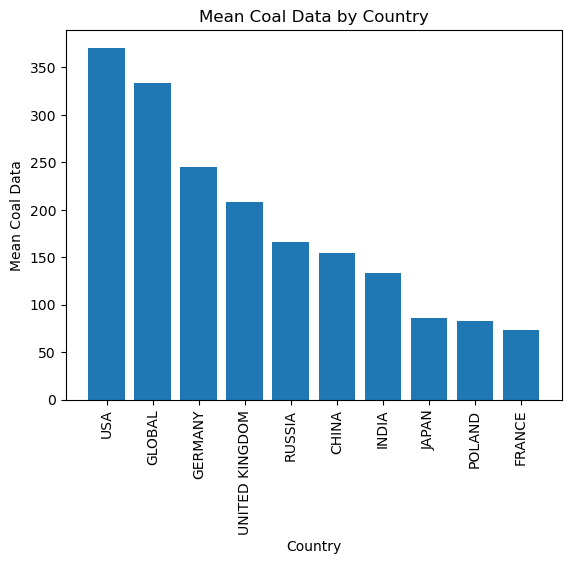

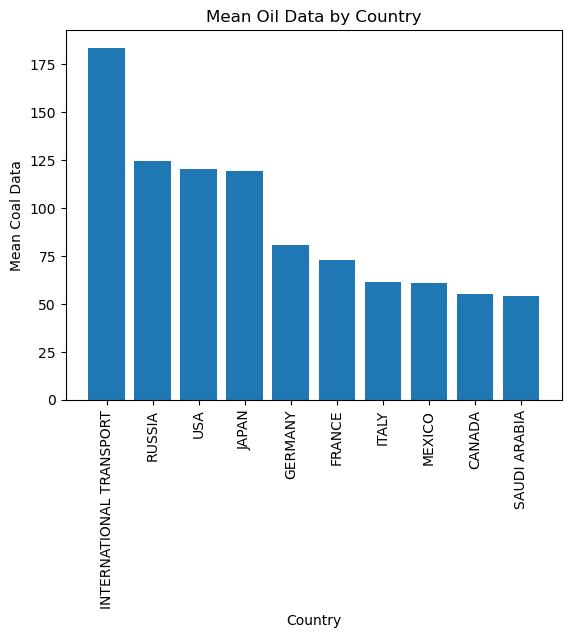

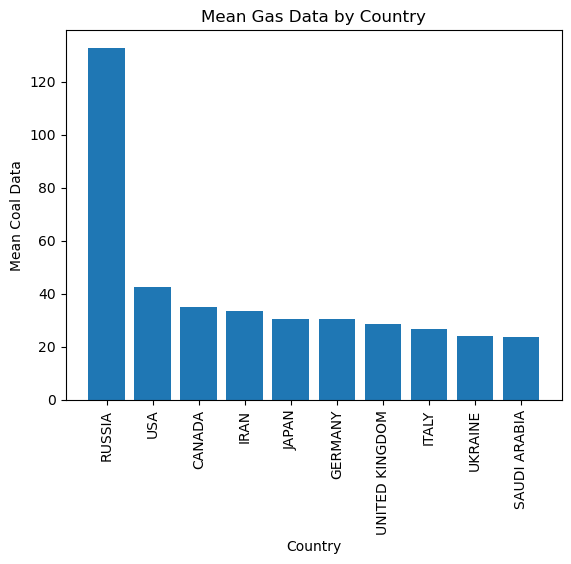

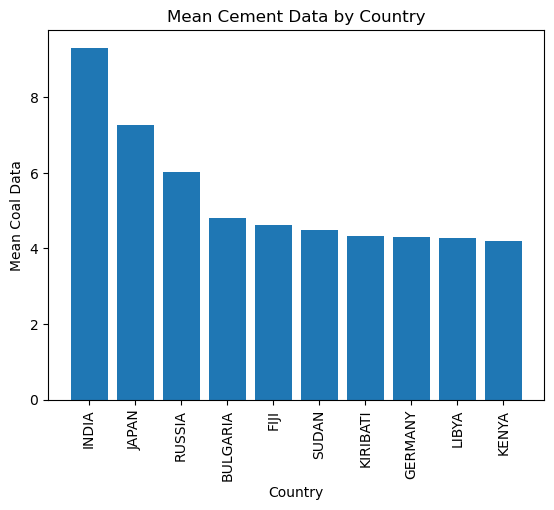

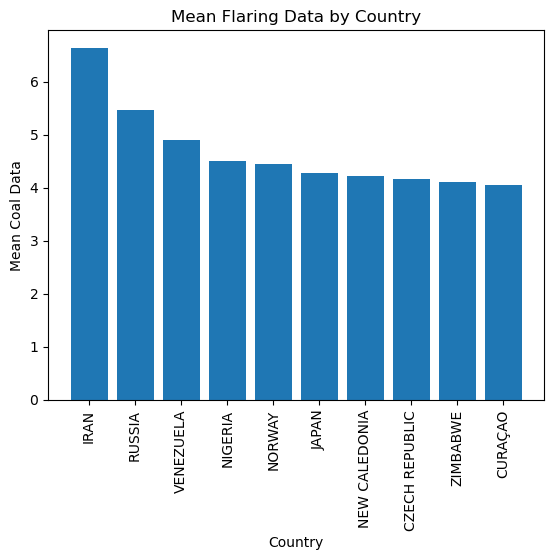

In [94]:
## Top 10 Mean of all sub list columns 
for col in sublist:
    mean_coal_data = clean_df.groupby('Country')[col].mean()
    top10Largest = mean_coal_data.nlargest(10)
    plt.bar(top10Largest.index, top10Largest.values)
    plt.xlabel('Country')
    plt.ylabel('Mean Coal Data')
    plt.title(f'Mean {col} Data by Country')
    plt.xticks(rotation=90)
    plt.show()  

In [95]:
df_encoded = pd.get_dummies(clean_df, columns=['Country', 'ISO'])

In [96]:
df_encoded.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,False,False,False,False,False,False,False,False,False,False
1,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,False,False,False,False,False,False,False,False,False,False
2,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,False,False,False,False,False,False,False,False,False,False
3,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,False,False,False,False,False,False,False,False,False,False
4,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,False,False,False,False,False,False,False,False,False,False


In [97]:
clean_df.columns[5:]

Index(['GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [98]:
non_categorical_cols = clean_df.columns[5:]

In [99]:
min_values = df_encoded[non_categorical_cols].min()
max_values = df_encoded[non_categorical_cols].max()

In [100]:
normalized_df = (df_encoded[non_categorical_cols] - min_values) / (max_values - min_values)


In [101]:
normalized_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,0.933051,0.00015,0.000547,0.0,0.000026,0.0,0.000962
1,0.660570,0.00015,0.000547,0.0,0.000026,0.0,0.000962
2,0.312929,0.00015,0.000547,0.0,0.000026,0.0,0.000962
3,0.407011,0.00015,0.000547,0.0,0.000026,0.0,0.000962
4,0.348614,0.00015,0.000547,0.0,0.000026,0.0,0.000962


In [102]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,5:]], axis=1)

In [103]:
pre_processed_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,Oil,Gas,Cement,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,0.933051,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,False,False,False,False,False,False,False,False,False,False
1,0.660570,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,False,False,False,False,False,False,False,False,False,False
2,0.312929,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,False,False,False,False,False,False,False,False,False,False
3,0.407011,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,False,False,False,False,False,False,False,False,False,False
4,0.348614,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,False,False,False,False,False,False,False,False,False,False


In [104]:
pre_processed_df.to_csv('emissions_by_country_preprocessed.csv', index=False)

### Dataset - Breeding Birds Atlas

In [105]:
df = pd.read_csv('breeding_bird_atlas.csv')

In [106]:
print("Dataset shape",df.shape)

Dataset shape (361582, 16)


In [107]:
df.head(10)

,Fed. Region,Block ID,Map Link,County,Common Name,Scientific Name,NYS Protection Status,Family Name,Family Description,Breeding Behavior,Month,Day,Year,Temperature,Average UB Student GPA,Breeding Status
0,NaN,5773C,50,NaN,NaN,12,10,71,TYRANT FLYCATCHERS,singing male present on more than one date in ...,NaN,NaN,1985.0,59,2.26,Probable
1,8.0,5569B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5569b...,ALBANY,Alder Flycatcher,Empidonax alnorum,Protected,TYRANNIDAE,TYRANT FLYCATCHERS,"Nest and eggs, bird on nest or egg, or eggshel...",NaN,NaN,1985.0,78,2.77,Confirmed
2,8.0,5773C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5773c...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Pair observed in suitable habitat in breeding ...,NaN,NaN,1985.0,72,3.08,Probable
3,8.0,5872A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872a...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,52,2.09,Possible
4,8.0,5570D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5570d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Singing male present on more than one date in ...,NaN,NaN,1985.0,28,2.28,Probable
5,8.0,5671D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5671d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,41,2.86,Possible
6,8.0,5669A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5669a...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,40,3.62,Possible
7,8.0,5872C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872c...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,35,3.06,Confirmed
8,8.0,5870D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5870d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Nest with young.,NaN,NaN,1985.0,55,3.11,Confirmed
9,8.0,5871B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5871b...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,74,3.15,Confirmed


In [108]:
df.describe()

,Fed. Region,Month,Day,Year,Temperature,Average UB Student GPA
count,355787.000000,3426.000000,9338.000000,351102.000000,361582.000000,361582.000000
mean,5.855652,49.772329,49.511994,1964.180056,49.467487,2.850668
std,5.836586,28.659289,28.794700,190.069866,17.322758,0.490552
min,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000
25%,3.000000,26.000000,25.000000,1982.000000,34.000000,2.430000
50%,6.000000,50.000000,49.000000,1983.000000,49.000000,2.850000
75%,8.000000,74.000000,75.000000,1984.000000,64.000000,3.280000
max,99.000000,99.000000,99.000000,1985.000000,79.000000,3.700000


In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361582 entries, 0 to 361581
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fed. Region             355787 non-null  float64
 1   Block ID                358864 non-null  object 
 2   Map Link                356865 non-null  object 
 3   County                  350980 non-null  object 
 4   Common Name             351052 non-null  object 
 5   Scientific Name         354097 non-null  object 
 6   NYS Protection Status   353112 non-null  object 
 7   Family Name             359126 non-null  object 
 8   Family Description      356849 non-null  object 
 9   Breeding Behavior       356399 non-null  object 
 10  Month                   3426 non-null    float64
 11  Day                     9338 non-null    float64
 12  Year                    351102 non-null  float64
 13  Temperature             361582 non-null  int64  
 14  Average UB Student G

In [110]:
print("Categorical Columns - ",df.select_dtypes(include=['object']).columns)

Categorical Columns -  Index(['Block ID', 'Map Link', 'County', 'Common Name', 'Scientific Name',
       'NYS Protection Status', 'Family Name', 'Family Description',
       'Breeding Behavior', 'Breeding Status'],
      dtype='object')


In [111]:
print("Numerical Columns-",df.select_dtypes(include=['int64','float64']).columns)

Numerical Columns- Index(['Fed. Region', 'Month', 'Day', 'Year', 'Temperature',
       'Average UB Student GPA'],
      dtype='object')


In [112]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features:', cat+num," = ",cat, 'categorical', '+',
      num, 'numerical')

Total Features: 16  =  10 categorical + 6 numerical


In [113]:
print("Null Values in each column")
print(df.isnull().sum())  
# since month and day are nearly empty , we can drop those columns
df = df.drop(columns=['Month','Day'],axis=1)

# dropping column - Map Link , Average UB Student GPA as it does not impute any relation to prediction
df = df.drop(columns=['Map Link','Average UB Student GPA'],axis = 1)


Null Values in each column
Fed. Region                 5795
Block ID                    2718
Map Link                    4717
County                     10602
Common Name                10530
Scientific Name             7485
NYS Protection Status       8470
Family Name                 2456
Family Description          4733
Breeding Behavior           5183
Month                     358156
Day                       352244
Year                       10480
Temperature                    0
Average UB Student GPA         0
Breeding Status                0
dtype: int64


In [114]:
# finding distinct data and correcting mismatched data
print("Unique values in each column- \n",df.nunique())

Unique values in each column- 
 Fed. Region               100
Block ID                 8365
County                    224
Common Name               727
Scientific Name           713
NYS Protection Status     118
Family Name               189
Family Description        193
Breeding Behavior         146
Year                      106
Temperature                60
Breeding Status             3
dtype: int64


In [115]:
print("Unique Values and their count\n")
for c in df.columns:
    print(df[c].value_counts(),end="\n")
    

Unique Values and their count

Fed. Region
8.0     48078
7.0     41295
4.0     40067
1.0     38963
5.0     38658
        ...  
92.0       24
67.0       24
91.0       24
46.0       22
47.0       21
Name: count, Length: 100, dtype: int64
Block ID
3768A    137
4372C    120
2972A    119
3275C    117
2472D    115
        ... 
2469b      1
2271d      1
2266b      1
2469a      1
3071a      1
Name: count, Length: 8365, dtype: int64
County
ST LAWRENCE    18242
ESSEX          11450
FRANKLIN       11079
HAMILTON       10820
DELAWARE       10482
               ...  
queens            14
richmond          11
bronx              6
new york           1
kings              1
Name: count, Length: 224, dtype: int64
Common Name
Song Sparrow              4847
American Robin            4824
Black-capped Chickadee    4811
Common Yellowthroat       4802
Blue Jay                  4778
                          ... 
LAUGHING GULL                1
american oystercatcher       1
clapper rail                 1
mute

#### Replacing Nan with Mean and Mode

In [116]:
# we replace missing values with mean - where data type is numerical and mode - where data type is categorical
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean_value = df[i].mean()
        df[i].fillna(math.ceil(mean_value),inplace=True)

print(df.isnull().sum())  

Fed. Region              0
Block ID                 0
County                   0
Common Name              0
Scientific Name          0
NYS Protection Status    0
Family Name              0
Family Description       0
Breeding Behavior        0
Year                     0
Temperature              0
Breeding Status          0
dtype: int64


#### Check for outliers

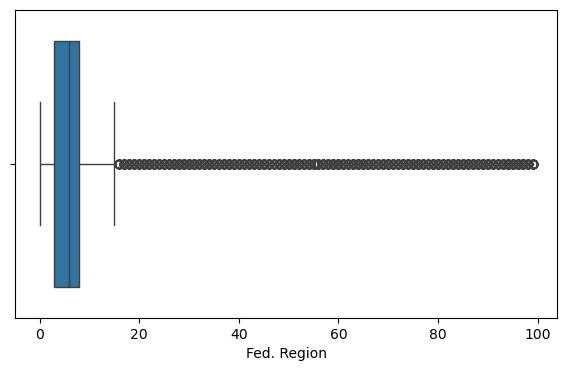

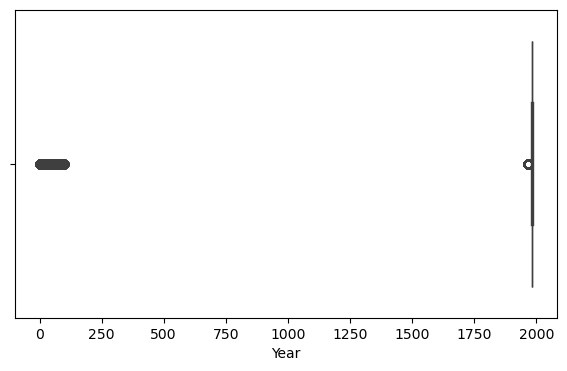

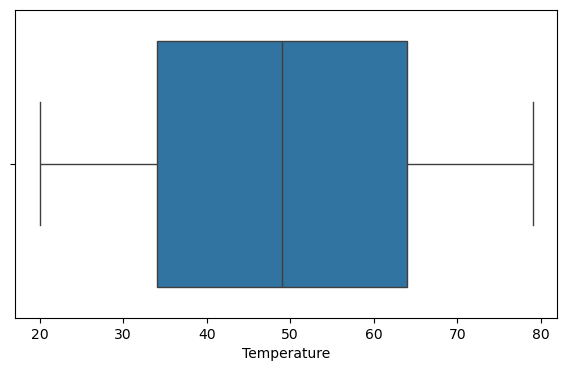

In [117]:
# plotting graph to understand the data and check for outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [118]:
# we see lot of outliers in Fed. Region and year , lets remove them 

print("Count where years < 1700: ",df[df['Year']<1700]['Year'].count())
print("Count where Fed. Region > 20: ",df[df['Fed. Region']>20]['Fed. Region'].count())

Count where years < 1700:  3423
Count where Fed. Region > 20:  2726


In [119]:
# since number of rows are greater we replace them with mean

yearMean = df[df['Year']>=1700]['Year'].mean()
df.loc[df['Year']<1700,'Year'] = math.ceil(yearMean)

regionMean = df[df['Fed. Region']<=20]['Fed. Region'].mean()
df.loc[df['Fed. Region']>20,'Fed. Region'] = math.ceil(regionMean)

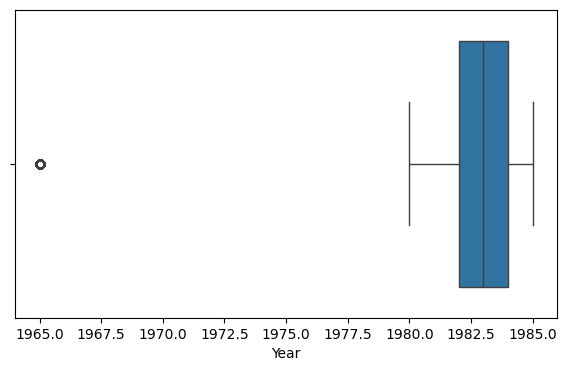

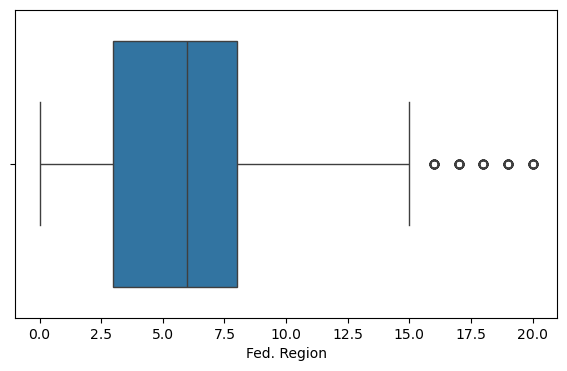

In [120]:
for c in ['Year','Fed. Region']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [121]:
# since there are some more outliers , lets increase the cut-off for outliers again in Years and Fed. Region

print("Count where years < 1900: ",df[df['Year']<1900]['Year'].count())
print("Count where Fed. Region > 15: ",df[df['Fed. Region']>15]['Fed. Region'].count())

Count where years < 1900:  0
Count where Fed. Region > 15:  164


In [122]:
# since there are few outliers in Fed. Region we replace them with mean

regionMean = df[df['Fed. Region']<=15]['Fed. Region'].mean()
df.loc[df['Fed. Region']>15,'Fed. Region'] = math.ceil(regionMean)

#### Handling mismatched string formats

In [123]:
# checking for numeric values in string values 

print("Numeric values in String data type:")
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    print(c,"-",numericValues.sum())

#  since the data count is high , we are replacing it with mode
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    modeValue = df[c].mode()[0] #getting first index
    df.loc[numericValues,c]=modeValue

# setting row values to lowercase to make all string unique
for c in df.select_dtypes(include=['object']):    
    df[c]=df[c].str.lower()

Numeric values in String data type:
Block ID - 6502
County - 3452
Common Name - 3454
Scientific Name - 6539
NYS Protection Status - 9259
Family Name - 9183
Family Description - 9205
Breeding Behavior - 6526
Breeding Status - 0


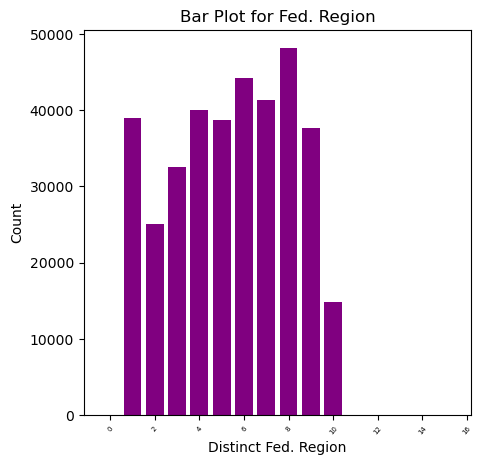

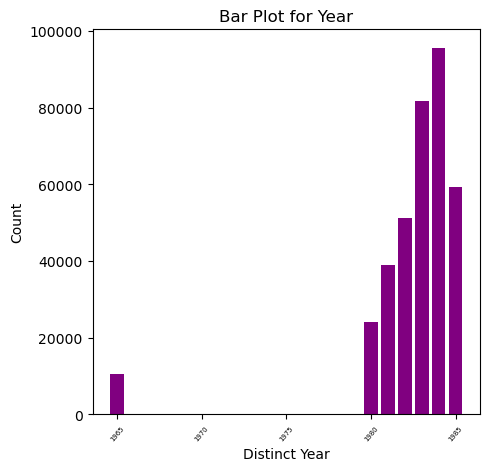

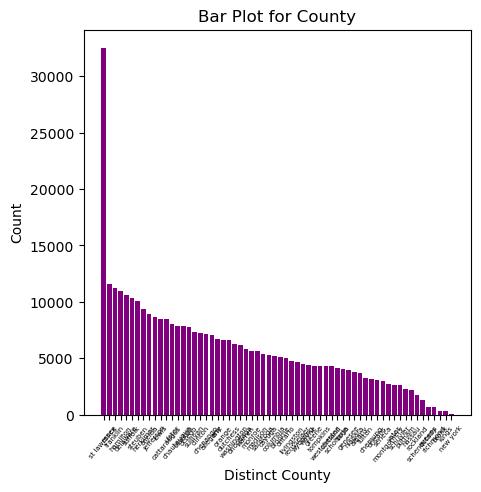

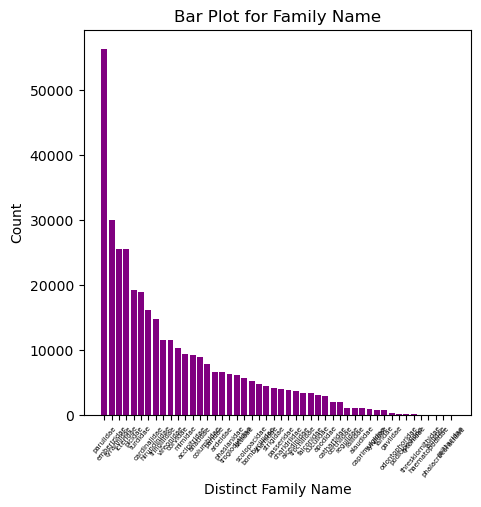

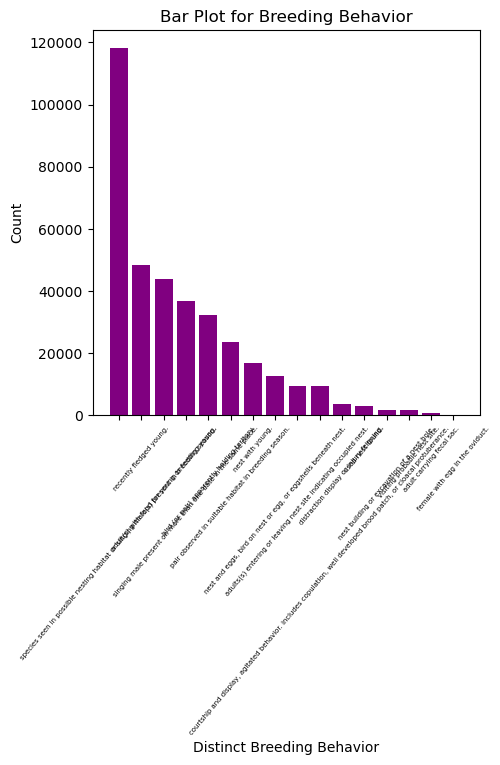

In [124]:
columns = ['Fed. Region','Year','County','Family Name','Breeding Behavior']
for c in columns:
    ct_count = df[c].value_counts()
    plt.figure(figsize=(5,5))
    plt.bar(ct_count.index,ct_count.values , color = 'purple')
    plt.title(f"Bar Plot for {c}")
    plt.xlabel(f"Distinct {c}")
    plt.ylabel("Count")
    plt.xticks(rotation = 50, fontsize=5)
    plt.show()


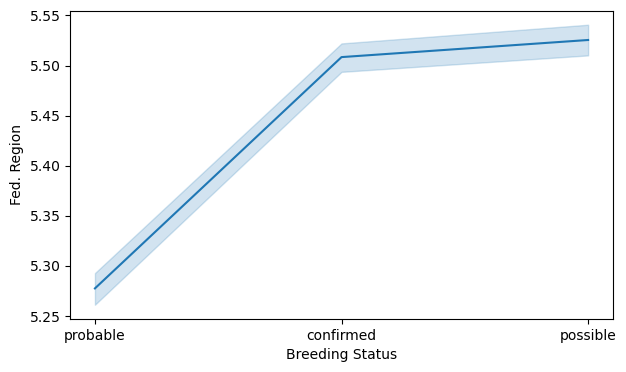

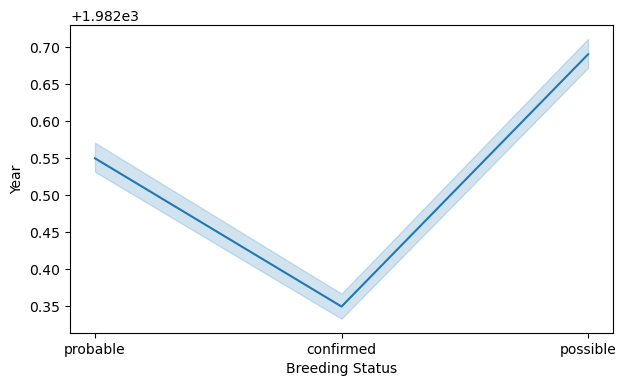

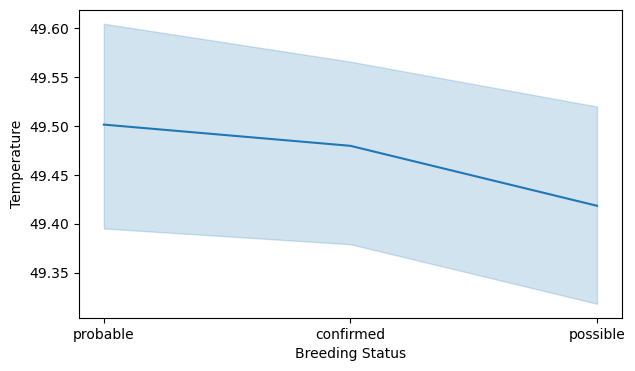

In [125]:
# check for skewness
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.lineplot(y=df[c],x=df["Breeding Status"])  
    plt.show()

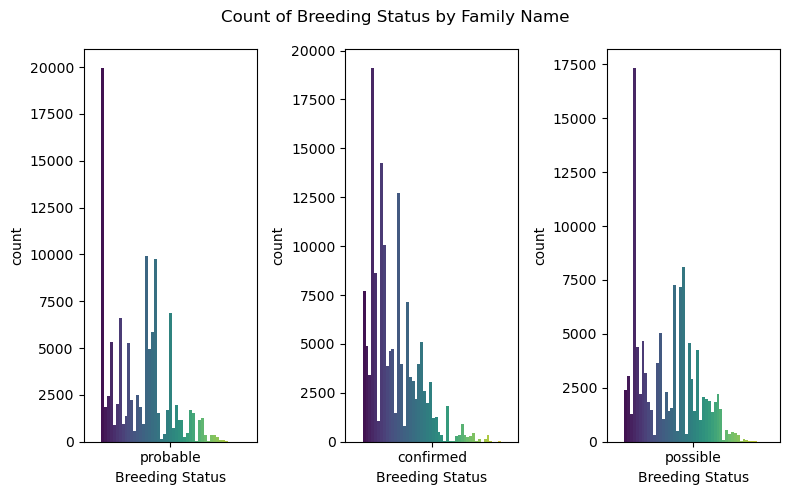

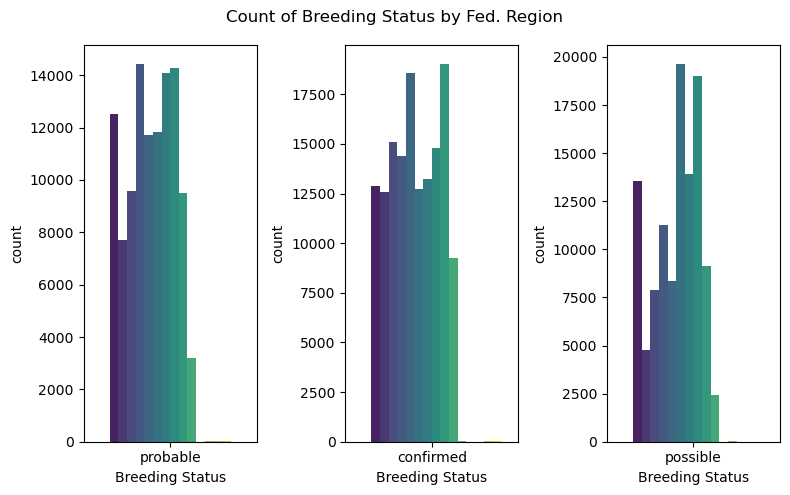

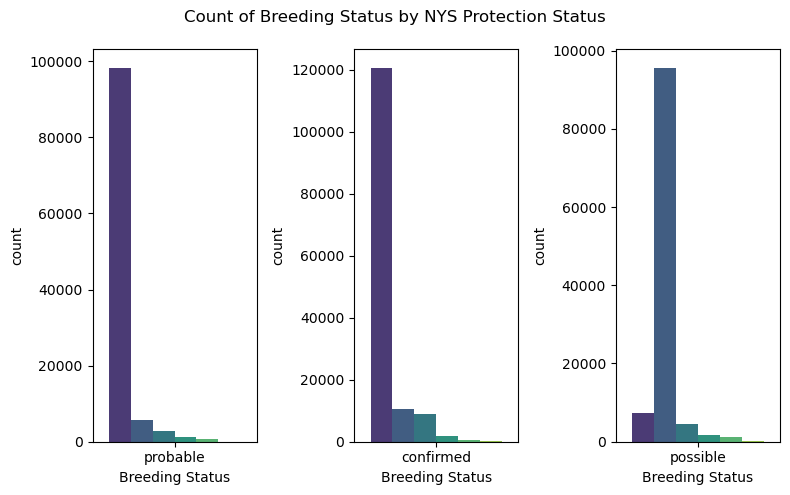

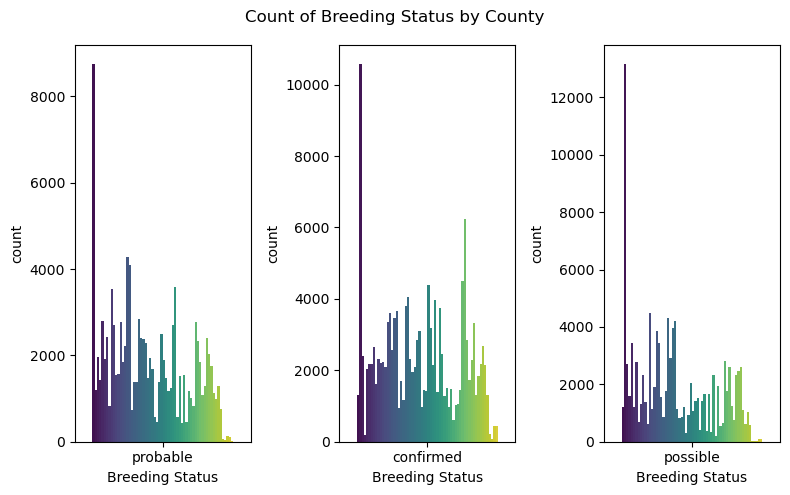

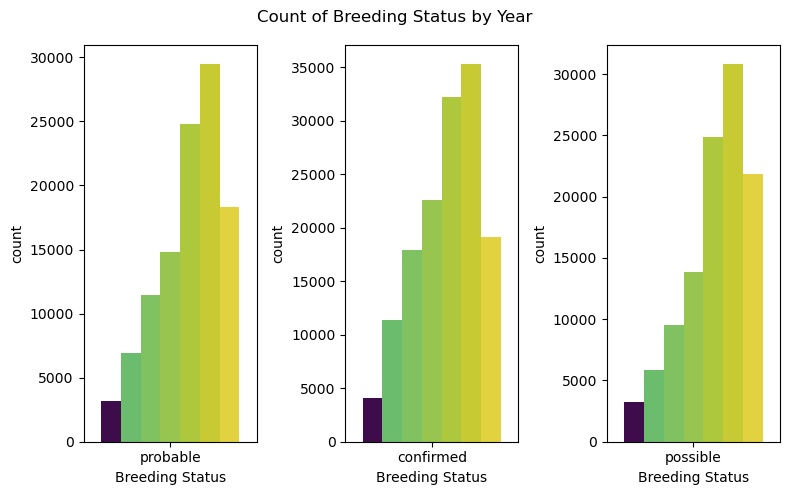

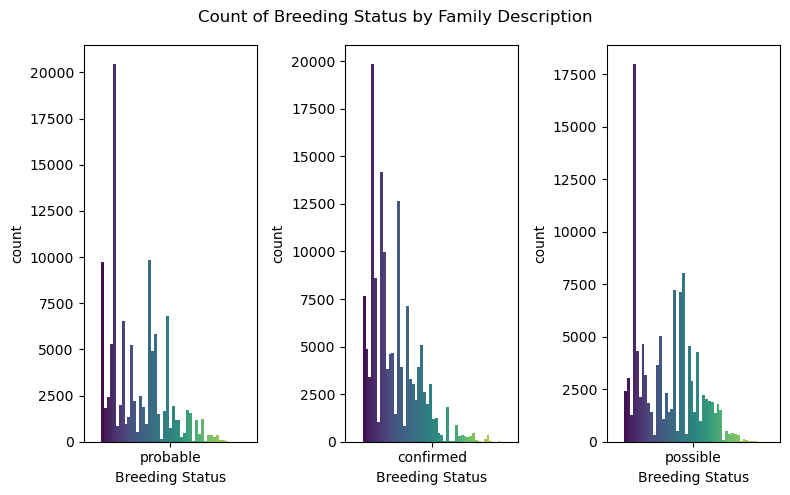

In [126]:
for col in list(set(df.columns) - set(['Breeding Status','Block ID','Common Name','Scientific Name','Temperature','Breeding Behavior'])):

    unique_values = df['Breeding Status'].unique()

    fig,axs=plt.subplots(1,len(unique_values),figsize=(8,5))
    for i, value in enumerate(unique_values):
        sub = df[df['Breeding Status']==value]
        sns.countplot(data=sub, x='Breeding Status', hue=col, palette='viridis',ax=axs[i])
        axs[i].legend_.remove()
    fig.suptitle(f'Count of {"Breeding Status"} by {col}')
    plt.tight_layout()
    plt.show()




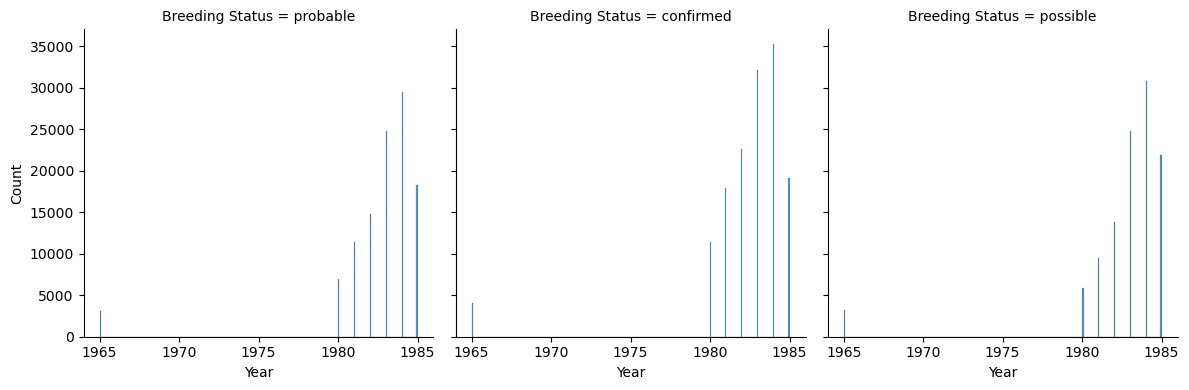

In [127]:
g = sns.FacetGrid(df, col="Breeding Status", col_wrap=3, height=4)
g.map(sns.histplot, 'Year') 
plt.show()


#### Encoding features to Categorical values

In [128]:
print("Unique values in each column after resolving mismatched data\n",df.nunique())

Unique values in each column after resolving mismatched data
 Fed. Region                16
Block ID                 5323
County                     62
Common Name               245
Scientific Name           245
NYS Protection Status       6
Family Name                48
Family Description         48
Breeding Behavior          16
Year                        7
Temperature                60
Breeding Status             3
dtype: int64


In [129]:
# since certains columns have lot of distinct values , it is not ideal to use one-hot encoding as it would make the model complex with lot of columns and create a over-fitted model
# hence we use frequency-encdoing
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Family Name"]:
    frequency = df[col].value_counts()
    df[col] = df[col].map(frequency)

# for others we can use one-hot encoding
for col in ["Breeding Behavior"]:
    df = pd.get_dummies(df, columns=[col],drop_first=True) 

# label-encoding
df['Breeding Status'] = df['Breeding Status'].apply(lambda x: 1 if x == 'confirmed' else 0)

# for NYS Protection Status we can do label encoding
uniqueCategory = df['NYS Protection Status'].unique()
categoryIndex = {category:id for id ,category in enumerate(uniqueCategory)}
df['NYS Protection Status Encoded'] = df['NYS Protection Status'].map(categoryIndex)
df = df.drop("NYS Protection Status",axis = 1)


# normalizing the data 
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Year","Temperature","Fed. Region","Family Name"]:
    xMax = df[col].max(axis=0)
    xMin = df[col].min(axis=0)
    df[col]=df[col].apply(lambda x: (x-xMin)/(xMax-xMin))
    


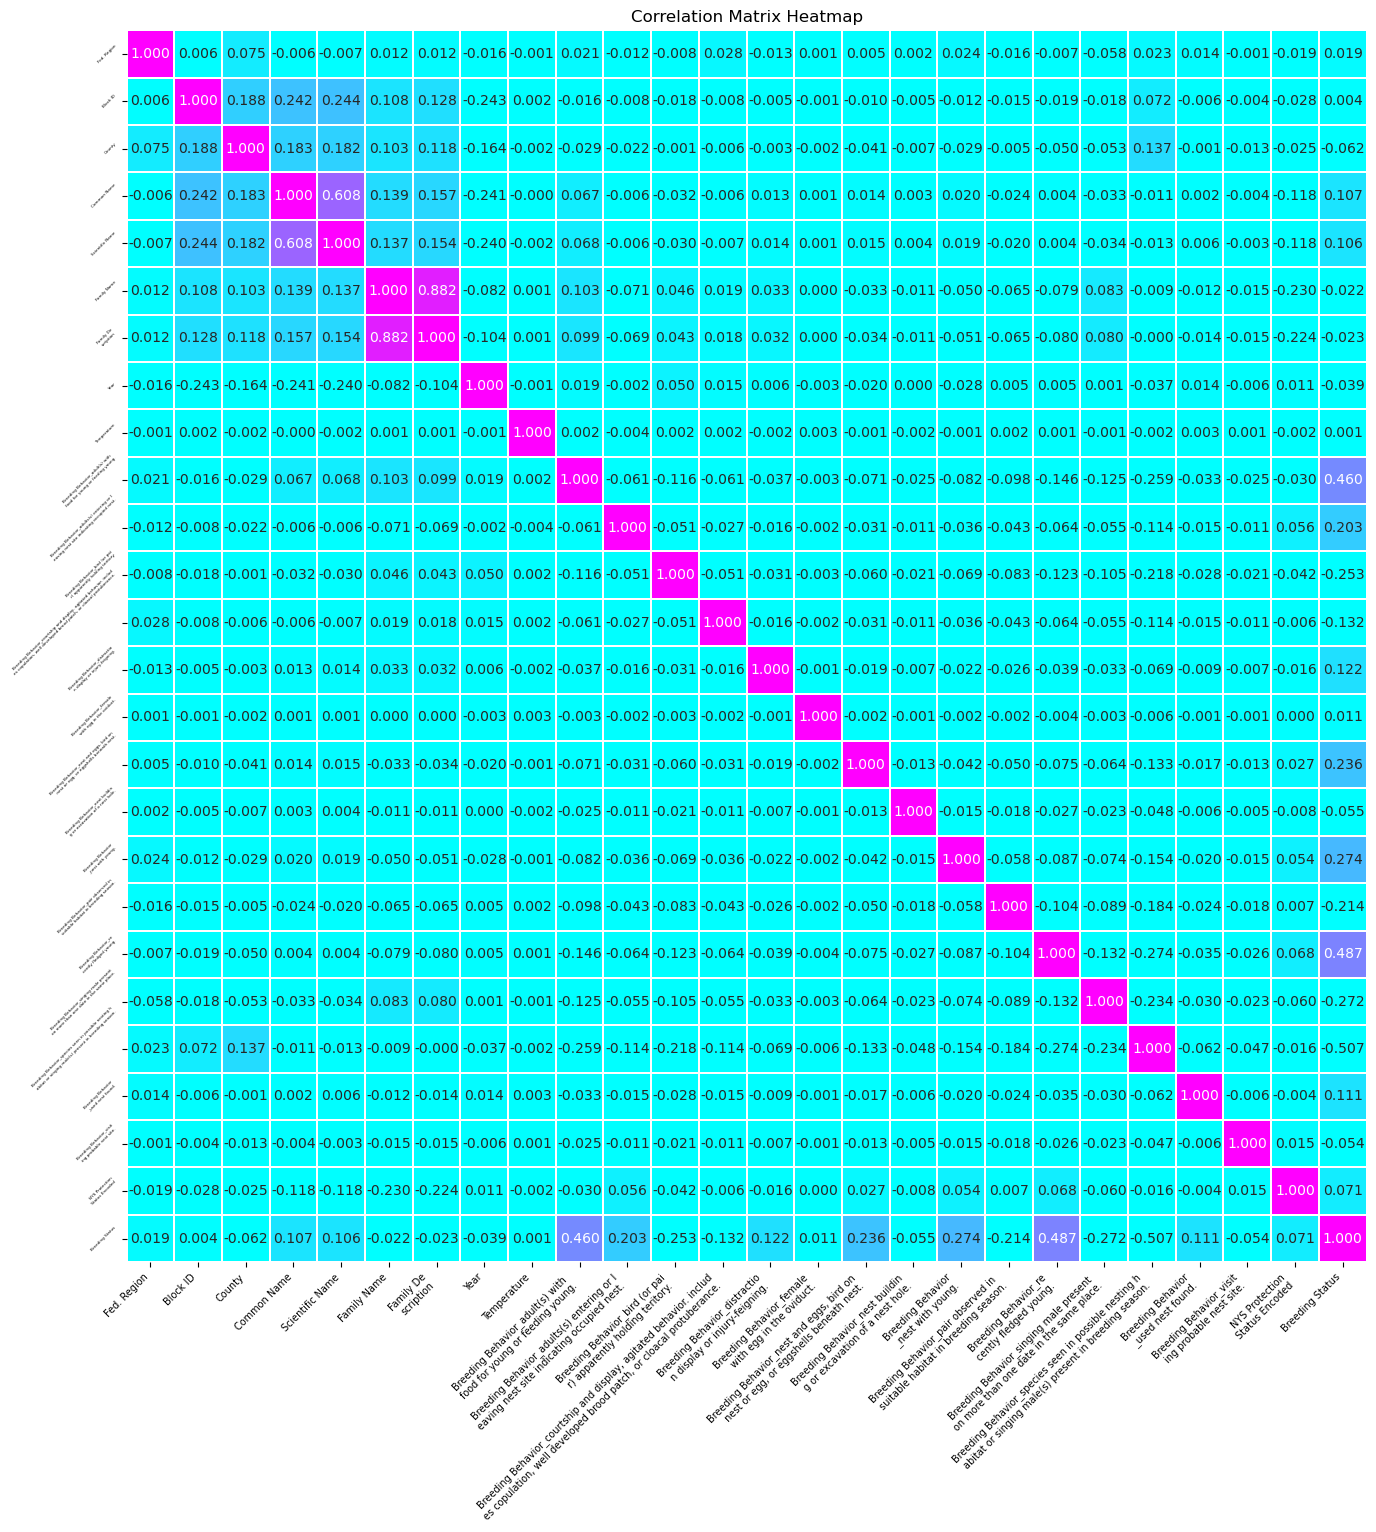

In [130]:
# re-arranging columns
columnOrder = [x for x in df.columns if x != "Breeding Status"] + ["Breeding Status"]
df = df[columnOrder]

temp_columns = []
for i in range(len(df.columns)):
    if len(df.columns[i])>15:
        temp_columns.append(df.columns[i][:int(len(df.columns[i])/2)]+"\n"+df.columns[i][int(len(df.columns[i])/2):])
    else:
        temp_columns.append(df.columns[i])

df.columns = temp_columns



correlation_matrix = df.corr()


plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='cool', vmin=0, vmax=1, linewidths=0.1, fmt='.3f' , cbar=False)    
plt.xticks(rotation=45, ha='right',fontsize=7) 
plt.yticks(rotation=45, ha='right',fontsize=3)
plt.title('Correlation Matrix Heatmap')
plt.show()

df.columns = columnOrder


#### Dropping Columns with low Correlation

In [131]:
# dropping columns - Block ID , Temperature as it has very low relation with Breeding Status
df = df.drop(columns=['Block ID','Temperature'],axis=1)

In [132]:
# family name and family description have same correlation , hence removing redundant column
df = df.drop(columns=['Family Description'],axis=1)

In [133]:
# same goes for scientific name and common name 
df = df.drop(columns=['Common Name'],axis=1)

In [134]:
df.to_csv('breeding_bird_atlas_preprocessed.csv', index=False)